# Import Modules

In [1]:
import os
import json 
import gzip

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Get the dataset (Amazon Video Game Reviews)

In [2]:
!curl https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz -o games.tsv
!gzip -d games.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  453M  100  453M    0     0  22.1M      0  0:00:20  0:00:20 --:--:-- 23.0M
gzip: games.tsv: unknown suffix -- ignored


In [2]:
#!curl http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz -o games.json.gz
#!gzip -d games.json.gz

# Load into Pandas DataFrame 

In [3]:
games = pd.read_json('games.json',lines=True)

# Examine Data

In [4]:
games.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [5]:
games.overall.value_counts()

5    299759
4     93654
3     49146
1     30883
2     24135
Name: overall, dtype: int64

In [6]:
games.isna().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          76
reviewText           158
summary              109
unixReviewTime         0
vote              389784
style             208340
image             493943
dtype: int64

In [7]:
games[games.reviewText.isna()==True].overall.value_counts()

5    136
4     10
3      6
1      4
2      2
Name: overall, dtype: int64

There are a very small number of reviews with no text, they make up a very small percentage of the overall reiews and don't look particularly biased, so they should be safe to drop

In [8]:
games.dropna(subset=['reviewText'], inplace=True)

In [9]:
games.isna().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          76
reviewText             0
summary              103
unixReviewTime         0
vote              389635
style             208296
image             493819
dtype: int64

Missing values in the other columns should not be as big of an issue, as they are not as integral to our analysis

Preprocessing and Visualization

In [10]:
def preprocess(text):
    words = text.split(' ')
           
    lem = nltk.stem.WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in words]
    
    stopwords = nltk.corpus.stopwords.words('english')
    words = [word for word in words if word not in stopwords]
   
    return ' '.join(words)

In [11]:
games['text_clean'] = games.reviewText.apply(preprocess)
games.sample(20)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,text_clean
78020,3,False,"06 9, 2007",A301B6L3TCD7WL,B000E0XX9Q,Tanya McHenry,It is a real shame that they managed to take t...,Potential Not Realized,1181347200,4,"{'Edition:': ' DVD-Rom', 'Platform:': ' PC'}",NaN,It real shame managed take stick NWN run it. T...
357396,4,True,"06 5, 2016",A3O6YGWWL55CHW,B00KG823T2,Douglas,"Farcry 3 is really good, the others are eh.",Four Stars,1465084800,NaN,{'Format:': ' Video Game'},NaN,"Farcry 3 really good, others eh."
461132,5,False,"03 17, 2009",A26MGHNE4VUV4E,B0008GJRRI,Jeremy,cabelas creates the best games ever they are s...,cabelas rocks,1237248000,NaN,NaN,NaN,cabelas creates best game ever realistic fanta...
258175,5,True,"04 23, 2014",A6SA5KKG3O7OP,B005T5OCAK,RONISVALDO RIBEIRO DOS SANTOS,Very good product as shown in the page for a v...,Excellent !!,1398211200,NaN,{'Edition:': ' Deadmund's Quest/Sports Champio...,NaN,Very good product shown page good price !! I r...
328402,5,True,"02 11, 2015",A2SRBZZ4QW20Z8,B00FAS1WDG,Josh,Plug it in and let windows find the drivers. T...,Works like a charm!,1423612800,NaN,NaN,NaN,Plug let window find drivers. The included dis...
44069,5,True,"11 23, 2015",A32RDJJ8L5EWAZ,B00008KU9Z,Chartrucksa,fun to play,Five Stars,1448236800,NaN,{'Format:': ' Video Game'},NaN,fun play
197529,5,True,"08 14, 2015",A2QQAMPZ99R9VP,B002BSA298,Chris in DC,Kinect is an amazing piece of technology and a...,Kinect is an amazing piece of technology and a...,1439510400,NaN,NaN,NaN,Kinect amazing piece technology great point di...
110776,3,False,"10 15, 2008",A1435P5AMCPB3X,B000S1MMIO,Concerned One,I have not had a wrestling game since the play...,"Fun game, just slow and cumbersome to play.",1224028800,2,{'Platform:': ' PlayStation 3'},NaN,"I wrestling game since playstation, I figured ..."
19660,5,True,"03 17, 2003",AJKWF4W7QD4NS,B00004YRQA,N. Durham,"Let's face it, when you first get a Playstatio...",The only memory card worth owning for your PS2,1047859200,20,NaN,NaN,"Let's face it, first get Playstation 2 games, ..."
91530,5,True,"02 24, 2015",A3CD1V2DO5XKZ5,B000HKIPGE,Jia Zhang,good,Five Stars,1424736000,NaN,{'Platform:': ' Sony PSP'},NaN,good


In [12]:
from wordcloud import WordCloud

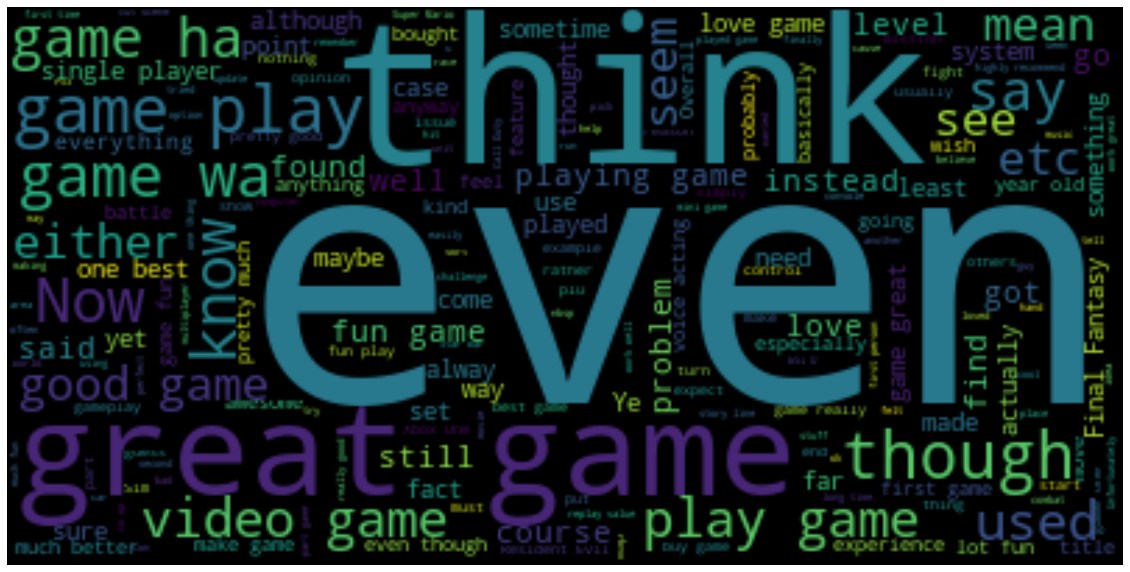

In [13]:
full_text = ' '.join(games.text_clean)
wordcloud = WordCloud().generate(full_text)

plt.rcParams["figure.figsize"] = (20,15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

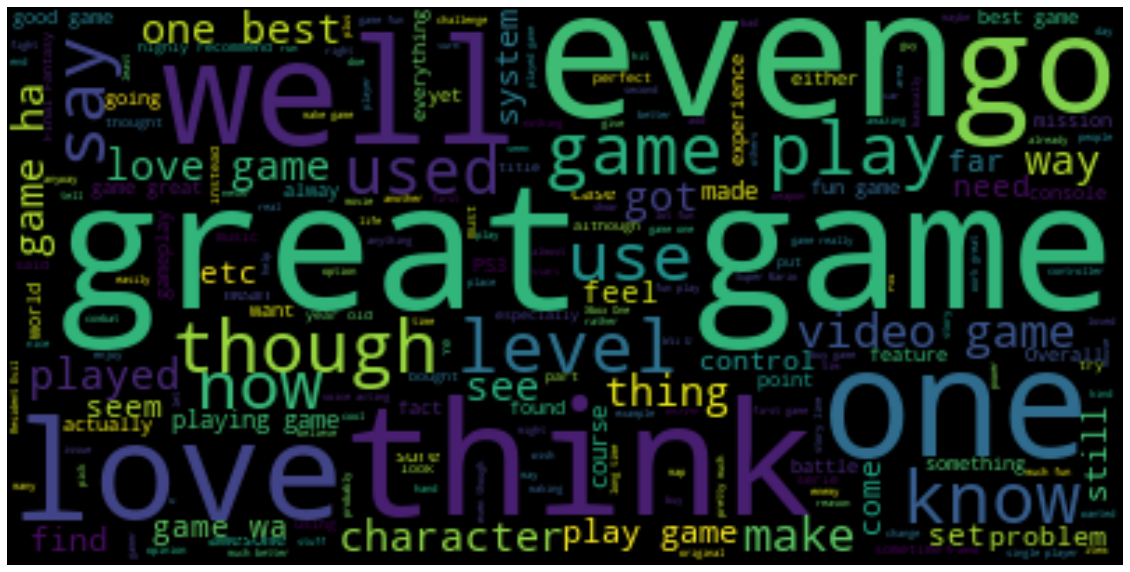

In [14]:
full_text = ' '.join(games.text_clean[games.overall==5])
wordcloud = WordCloud().generate(full_text)

plt.rcParams["figure.figsize"] = (20,15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

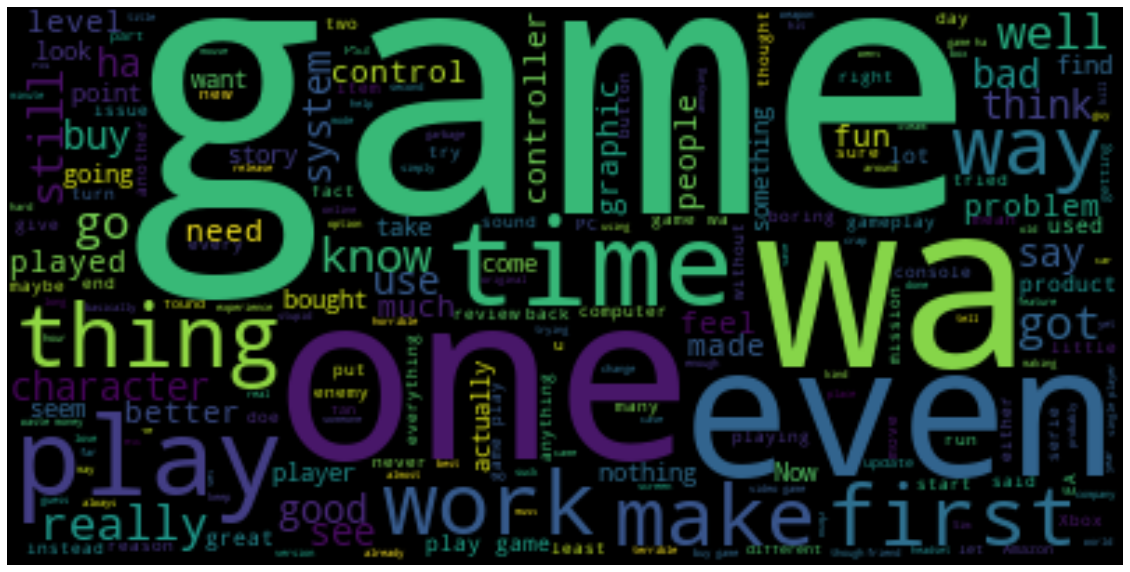

In [15]:
full_text = ' '.join(games.text_clean[games.overall==1])
wordcloud = WordCloud().generate(full_text)

plt.rcParams["figure.figsize"] = (20,15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Set up NLP [RAJA BROKEN]

In [16]:
# import nltk
# nltk.download('stopwords') 
# nltk.download('wordnet')

# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# def preprocess_text(text):
#     # Tokenise words while ignoring punctuation
#     tokeniser = RegexpTokenizer(r'\w+')
#     tokens = tokeniser.tokenize(text)

#     # Lowercase and lemmatise 
#     lemmatiser = WordNetLemmatizer()
#     lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]

#     # Remove stopwords
#     keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
#     return keywords


# X_train = video_game_data[['reviewText']]

# vectoriser = TfidfVectorizer(analyzer=preprocess_text)
# # Fit to the data and transform to feature matrix
# X_train = vectoriser.fit_transform(X_train['reviewText'])
# # Convert sparse matrix to dataframe
# X_train = pd.DataFrame.sparse.from_spmatrix(X_train)
# # Save mapping on which index refers to which words
# col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# # Rename each column using the mapping
# for col in X_train.columns:
#     X_train.rename(columns={col: col_map[col]}, inplace=True)
# X_train



## Tensorflow NLP

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
import re
import warnings 
warnings.filterwarnings('ignore')
from subprocess import check_output


In [7]:
!curl https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz -o games.tsv.gz
!gzip -d games.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  453M  100  453M    0     0  19.6M      0  0:00:23  0:00:23 --:--:-- 20.3M


In [8]:
games = pd.read_csv('games.tsv', sep='\t', error_bad_lines=False)

b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'


In [9]:
games.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780268 entries, 0 to 1780267
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 203.7+ MB


In [11]:
games.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.780268e+06,1.780268e+06,1.780268e+06,1.780268e+06,1.780268e+06
mean,2.803021e+07,4.954251e+08,4.059375e+00,2.263971e+00,3.764128e+00
std,1.562851e+07,2.909145e+08,1.355964e+00,1.919211e+01,2.247177e+01
min,1.001800e+04,3.140000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.429715e+07,2.452708e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,2.732141e+07,4.920909e+08,5.000000e+00,0.000000e+00,1.000000e+00
75%,4.274834e+07,7.485890e+08,5.000000e+00,1.000000e+00,3.000000e+00
max,5.309656e+07,9.999685e+08,5.000000e+00,1.049800e+04,1.078000e+04


In [12]:
games.duplicated().sum()

0

In [13]:
games.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


In [14]:
len(games)

1780268

In [15]:
games.iloc[0:20].review_headline

0     an amazing joystick. I especially love that yo...
1     Definitely a silent mouse... Not a single clic...
2                                              One Star
3                             good, but could be bettee
4                                     Great but flawed.
5                                              One Star
6                                                A Must
7                                            Five Stars
8                                            Five Stars
9                                            Four Stars
10                                           Five Stars
11                                  Game will get stuck
12    We have tried it with kids ages 4-7 and none o...
13                                           Four Stars
14    Now i have to buy a better one. Sorry guys but...
15                                           Five Stars
16                                           Five Stars
17                                           Fiv

In [16]:
games.iloc[0:5].review_body

0    Used this for Elite Dangerous on my mac, an am...
1    Loved it,  I didn't even realise it was a gami...
2       poor quality work and not as it is advertised.
3    nice, but tend to slip away from stick in inte...
4    Great amiibo, great for collecting. Quality ma...
Name: review_body, dtype: object

In [17]:
games = games[['review_body','star_rating']]

In [18]:
games

,review_body,star_rating
0,"Used this for Elite Dangerous on my mac, an am...",5
1,"Loved it, I didn't even realise it was a gami...",5
2,poor quality work and not as it is advertised.,1
3,"nice, but tend to slip away from stick in inte...",3
4,"Great amiibo, great for collecting. Quality ma...",4
...,...,...
1780263,I don't think it is necessary for me to wax po...,5
1780264,If I could rate higher than a ten I would. Thi...,5
1780265,Fewer than 1 in 3 modern Windows computers are...,1
1780266,Unfortunately Riven is available only to those...,1


In [19]:
row_select_1 = games['star_rating'] < 3
row_select_2 = games['star_rating'] == 3
games['sentiment'] = pd.Series(['Positive']*len(games.index))
games.loc[row_select_1,'sentiment'] = 'Negative'
games.loc[row_select_2,'sentiment'] = 'Neutral'

In [20]:
games = games[['review_body','sentiment']]
games.columns = ['text', 'sentiment']

In [21]:
games

,text,sentiment
0,"Used this for Elite Dangerous on my mac, an am...",Positive
1,"Loved it, I didn't even realise it was a gami...",Positive
2,poor quality work and not as it is advertised.,Negative
3,"nice, but tend to slip away from stick in inte...",Neutral
4,"Great amiibo, great for collecting. Quality ma...",Positive
...,...,...
1780263,I don't think it is necessary for me to wax po...,Positive
1780264,If I could rate higher than a ten I would. Thi...,Positive
1780265,Fewer than 1 in 3 modern Windows computers are...,Negative
1780266,Unfortunately Riven is available only to those...,Negative


In [22]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

In [23]:
games = games[games.sentiment != "Neutral"]
games['text'] = games['text'].apply(lambda x: str(x).lower())
games['text'] = games['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(games[ games['sentiment'] == 'Positive'].size)
print(games[ games['sentiment'] == 'Negative'].size)

for idx,row in games.iterrows():
    row[0] = row[0].replace('rt',' ')
    
tokenizer = Tokenizer(nb_words = max_features, split=' ')
tokenizer.fit_on_texts(games['text'].values)
X = tokenizer.texts_to_sequences(games['text'].values)
X = pad_sequences(X, maxlen = maxlen)

2681254
572380


In [24]:
Y = pd.get_dummies(games['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1301453, 100) (1301453, 2)
(325364, 100) (325364, 2)


In [25]:
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
dropout (Dropout)            (None, 100, 128)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 70)                37800     
_________________________________________________________________
dense (Dense)                (None, 2)                 142       
Total params: 2,638,966
Trainable params: 2,638,966
Non-trainable params: 0
_______________________________

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

NameError: name 'tf' is not defined

In [ ]:
print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Train...
Epoch 1/2
43382/43382 [==============================] - 686s 16ms/step - loss: 0.1203 - accuracy: 0.9546 - val_loss: 0.1274 - val_accuracy: 0.9519


In [ ]:
yhat = model.predict(X_test, verbose = 2, batch_size = batch_size)
from sklearn import metrics
print(metrics.classification_report(Y_test[:,1], np.round(yhat[:,1]) ,target_names = ["negative", "positive"]))

10846/10846 - 25s
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86     57004
    positive       0.97      0.97      0.97    268360

    accuracy                           0.95    325364
   macro avg       0.92      0.91      0.92    325364
weighted avg       0.95      0.95      0.95    325364



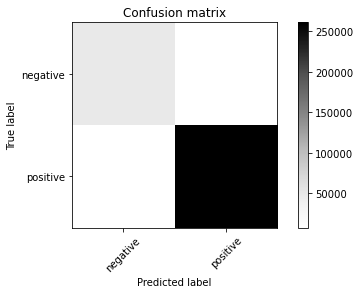

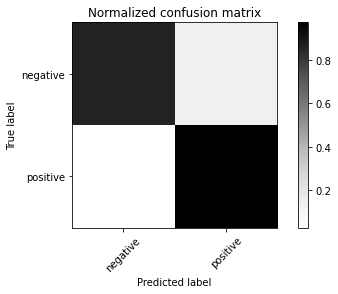

In [ ]:
score = ['negative', 'positive']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(score)))
    plt.xticks(tick_marks, score, rotation=45)
    plt.yticks(tick_marks, score)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test[:,1], np.round(yhat[:,1]))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model_conv_lstm.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_conv_lstm.h5")

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

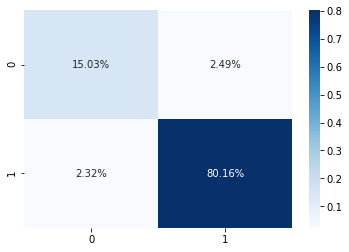

In [52]:
p = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

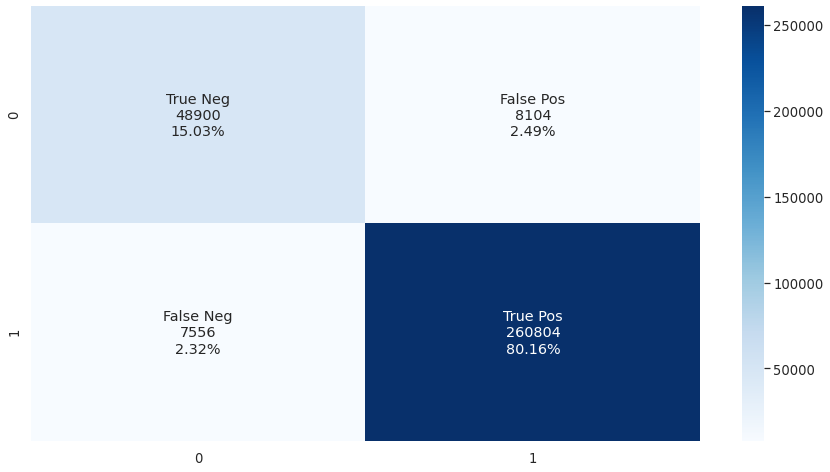

In [68]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.subplots(figsize=(15,8))
sns.set(font_scale=1.2)
p = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

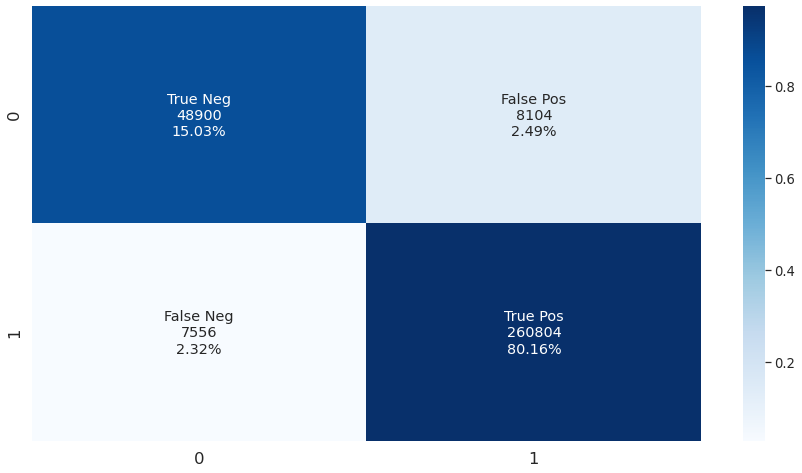

In [67]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplots(figsize=(15,8))
sns.set(font_scale=1.2)
p = sns.heatmap(cm_normalized, annot=labels, fmt='', cmap='Blues')

.

### Citation For data:
    
Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019